In [ ]:
!pip install fbprophet
from fbprophet import Prophet

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,LSTM,LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.python.framework import ops
from sklearn.metrics import mean_absolute_error,mean_squared_error
import random
from tqdm.notebook import trange
import datetime as dt

In [28]:
df = pd.read_csv('./TFP.csv')

In [29]:
df.shape

(186, 3)

In [30]:
df.columns

Index(['isocode', 'year', 'rtfpna'], dtype='object')

In [31]:
set(df.isocode)

{'CAN', 'MEX', 'USA'}

In [32]:
df.index = df.year

In [33]:
year = df[df.isocode=='USA'].year

In [34]:
usa_rtfpna = df[df.isocode=='USA'].rtfpna
can_rtfpna = df[df.isocode=='CAN'].rtfpna
mex_rtfpna = df[df.isocode=='MEX'].rtfpna

In [35]:
usa_rtfpna

year
1950    0.617148
1951    0.629588
1952    0.638451
1953    0.651858
1954    0.646179
          ...   
2007    1.006595
2008    0.998499
2009    0.986738
2010    1.009463
2011    1.020392
Name: rtfpna, Length: 62, dtype: float64

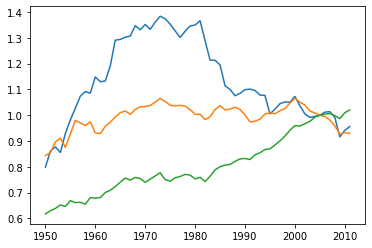

In [10]:
plt.plot(mex_rtfpna)
plt.plot(can_rtfpna)
plt.plot(usa_rtfpna)

In [11]:
anos=usa_rtfpna.index
ds=[]
for i in range(anos[0],anos[-1]+10):
    ds.append(dt.datetime(i,1,1))

In [39]:
usa_rtfpna

year
1950    0.617148
1951    0.629588
1952    0.638451
1953    0.651858
1954    0.646179
          ...   
2007    1.006595
2008    0.998499
2009    0.986738
2010    1.009463
2011    1.020392
Name: rtfpna, Length: 62, dtype: float64

In [36]:
USA=pd.DataFrame({'ds':ds[:-19],'y':usa_rtfpna.values[:-10]})
USA_test=pd.DataFrame({'ds':ds[:-9],'y':usa_rtfpna.values})
USA_test.index=USA_test.ds

In [40]:
USA_test

,ds,y
ds,,
1950-01-01,1950-01-01,0.617148
1951-01-01,1951-01-01,0.629588
1952-01-01,1952-01-01,0.638451
1953-01-01,1953-01-01,0.651858
1954-01-01,1954-01-01,0.646179
...,...,...
2007-01-01,2007-01-01,1.006595
2008-01-01,2008-01-01,0.998499
2009-01-01,2009-01-01,0.986738


In [15]:
USA

,ds,y
0,1950-01-01,0.617148
1,1951-01-01,0.629588
2,1952-01-01,0.638451
3,1953-01-01,0.651858
4,1954-01-01,0.646179
5,1955-01-01,0.668773
6,1956-01-01,0.661000
7,1957-01-01,0.662165
8,1958-01-01,0.654813
9,1959-01-01,0.680680


In [153]:
from fbprophet import Prophet
m = Prophet()
m.fit(USA)

In [154]:
m = Prophet()
m.fit(USA)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future=pd.DataFrame({'ds':ds[-19:]})
future

,ds
0,2002-01-01
1,2003-01-01
2,2004-01-01
3,2005-01-01
4,2006-01-01
5,2007-01-01
6,2008-01-01
7,2009-01-01
8,2010-01-01
9,2011-01-01


In [157]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14,2016-01-01,1.117509,1.089601,1.147439
15,2017-01-01,1.129120,1.099253,1.160324
16,2018-01-01,1.136077,1.102934,1.170138
17,2019-01-01,1.146896,1.112110,1.183571
18,2020-01-01,1.161570,1.122392,1.198316


In [158]:
forecast.index=forecast.ds

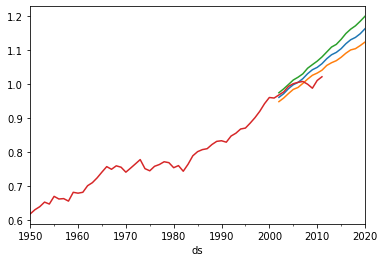

In [159]:
forecast.yhat.plot()
forecast.yhat_lower.plot()
forecast.yhat_upper.plot()
USA_test.y.plot()

In [160]:
MEX=pd.DataFrame({'ds':ds[:-19],'y':mex_rtfpna.values[:-10]})
MEX_test=pd.DataFrame({'ds':ds[:-9],'y':mex_rtfpna.values})
MEX_test.index=MEX_test.ds

In [161]:
m = Prophet()
m.fit(MEX)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [162]:
forecast.index=forecast.ds

In [163]:
future_mex=pd.DataFrame({'ds':ds[-19:]})

In [164]:
future_mex = m.predict(future)
future_mex[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14,2016-01-01,0.804108,0.720812,0.893173
15,2017-01-01,0.788604,0.694089,0.881459
16,2018-01-01,0.764561,0.663967,0.864180
17,2019-01-01,0.752606,0.650044,0.858688
18,2020-01-01,0.752740,0.644556,0.875421


In [165]:
future_mex.index=future_mex.ds

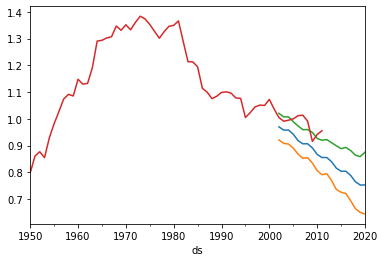

In [168]:
future_mex.yhat.plot()
future_mex.yhat_lower.plot()
future_mex.yhat_upper.plot()
MEX_test.y.plot()

In [169]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [170]:
USA

,ds,y
0,1950-01-01,0.617148
1,1951-01-01,0.629588
2,1952-01-01,0.638451
3,1953-01-01,0.651858
4,1954-01-01,0.646179
5,1955-01-01,0.668773
6,1956-01-01,0.661000
7,1957-01-01,0.662165
8,1958-01-01,0.654813
9,1959-01-01,0.680680


In [176]:
model=SARIMAX(np.log(USA.y.values),order=(4,1,4),seasonal_order=(4,0,0,6),
              enforce_stationarity=False,enforce_invertibility=False)

In [177]:
model_fit=model.fit()

/home/otavio/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [183]:
future_mex['SARIMAX']=np.exp(model_fit.forecast(19))

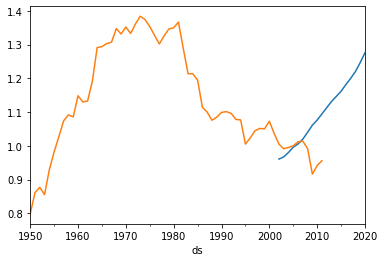

In [184]:
future_mex.SARIMAX.plot()
MEX_test.y.plot()